In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pandas as pd
from sklearn import linear_model
from cmf.cmfpn import CMFPN
from cmf.cnmf import CNMF
from cmf.utils import rmse, absolute_deviation_scaling, generate_data, regression_experiment, completion_experiment, GasDataLoader
from cmf.wrapper import TimeSeriesLinearRegression, MatrixCompletionRegression, RPCA
from cmf.experiment import hyperparameter_selection, test, plot_estimates_histogram, plot_ground_truth, get_final_section
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
loader = GasDataLoader('C:/Users/ash/Dropbox/UT/mist6/cmf/dat/gas/ethylene_methane_down_sampled.txt')
cmfpn_l1_weight, ppca_n_components, bpca_n_components = hyperparameter_selection(loader, verbose=2)
print(cmfpn_l1_weight, ppca_n_components, bpca_n_components)
mean_rmse, mean_md, c2h4_ch4_completer_dict = test(loader, cmfpn_l1_weight, ppca_n_components, bpca_n_components, verbose=2)

mean RMSE of CMF on validation data:
{'2.0': 1.0987682372385186, '4.0': 0.74822591354256407, '6.0': 1.1163051871851248, '8.0': 1.1235941157488416, '10.0': 0.66573342131652247, '12.0': 1.0757030905141349, '14.0': 1.176467621264951, '16.0': 1.1776680188134212, '18.0': 0.92146422386924531}
mean absolute deviation of CMF on validation data:
{'2.0': 0.26613474509420121, '4.0': 0.25869884067266691, '6.0': 0.28300664760721245, '8.0': 0.26189576584962088, '10.0': 0.25986577081425921, '12.0': 0.27150556573261131, '14.0': 0.25636918090275224, '16.0': 0.28805496095886785, '18.0': 0.25937635296302386}
mean RMSE of ppca on validation data:
{'1': 1.3912495169556789, '2': 1.3894683356516784, '3': 1.4382792388885739, '4': 1.4410285835490422, '5': 1.134467212321167, '6': 1.5550707392350009, '7': 1.4497848182949054, '8': 1.4140128868604733, '9': 1.4255906729738979, '10': 1.310305941775737, '11': 1.5249627811285102, '12': 1.7827710055927755, '13': 1.5692461806035696, '14': 1.5381534304012081, '15': 1.692

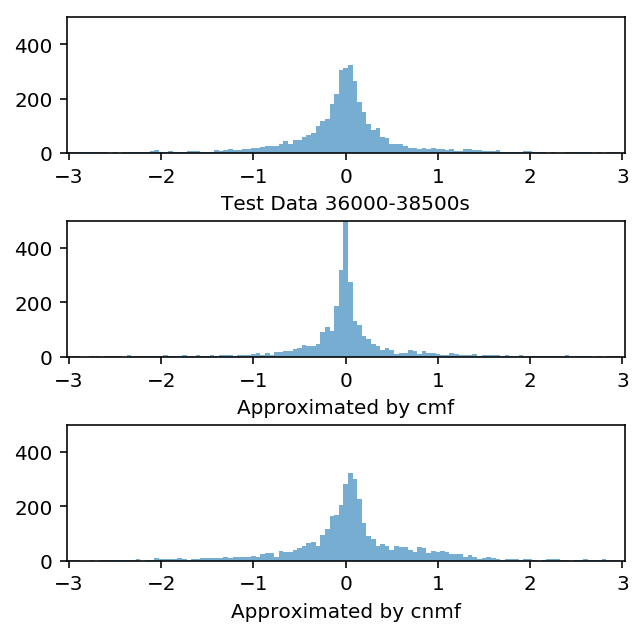

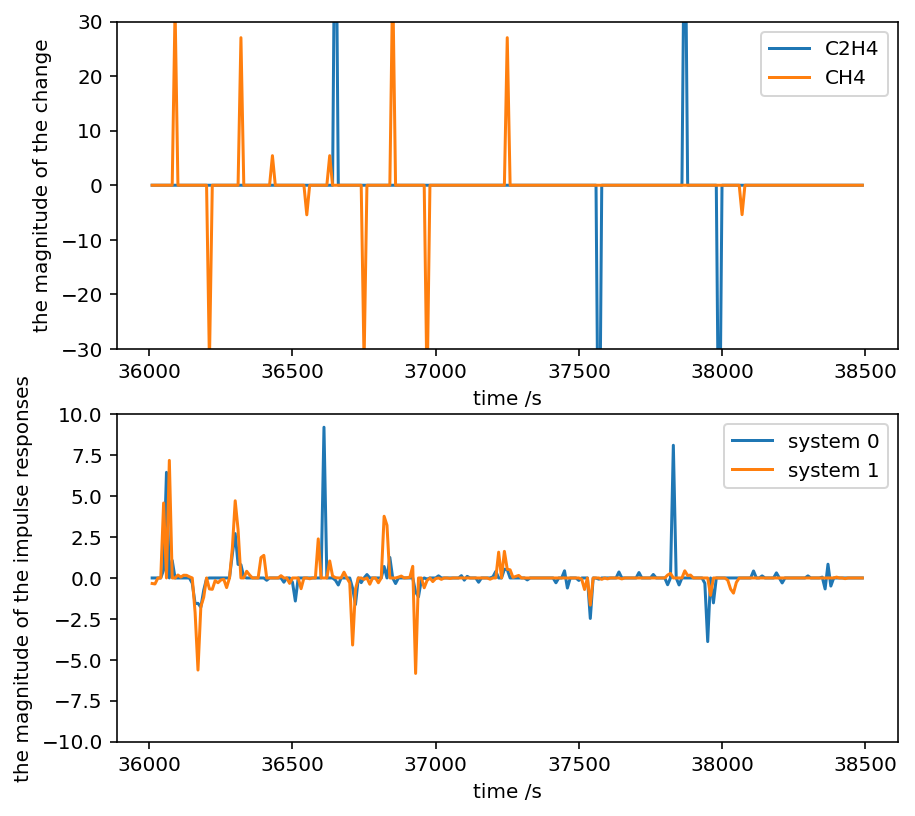

In [15]:
%config InlineBackend.figure_format = 'retina'
plot_estimates_histogram(loader, {'cmf': c2h4_ch4_completer_dict['cmf'], 'cnmf': c2h4_ch4_completer_dict['cnmf']}, label=('C2H4', 'CH4'))
plot_ground_truth(loader, c2h4_ch4_completer_dict['cmf'], label=('C2H4', 'CH4'), signal_sign_permute=[[0,1],[1,0]], figsize=(7,8))
pass

In [4]:
loader = GasDataLoader('C:/Users/ash/Dropbox/UT/mist6/cmf/dat/gas/ethylene_CO_down_sampled.txt')
cmfpn_l1_weight, ppca_n_components, bpca_n_components = hyperparameter_selection(loader, verbose=2)
print(cmfpn_l1_weight, ppca_n_components, bpca_n_components)
mean_rmse, mean_md, c2h4_co_completer_dict = test(loader, cmfpn_l1_weight, ppca_n_components, bpca_n_components, verbose=2)

mean RMSE of CMF on validation data:
{'2.0': 1.6377954584034466, '4.0': 1.6706997736849594, '6.0': 1.1569510225448763, '8.0': 1.3519241403658553, '10.0': 1.3391470757039632, '12.0': 1.3388156800582733, '14.0': 1.3951477445571769, '16.0': 1.5603043477301772, '18.0': 1.7514249851124695}
mean absolute deviation of CMF on validation data:
{'2.0': 0.27358604226275623, '4.0': 0.26669075215654126, '6.0': 0.24985689225176375, '8.0': 0.25203560397941394, '10.0': 0.26129593357405023, '12.0': 0.2642844173321594, '14.0': 0.27147827521175738, '16.0': 0.26068597243901359, '18.0': 0.28340126149844863}
mean RMSE of ppca on validation data:
{'1': 1.2852031935813693, '2': 1.6482608858961352, '3': 1.4901132025731207, '4': 1.7058673316304769, '5': 1.5129111030842619, '6': 1.6314617230036059, '7': 1.6893291159881538, '8': 1.6589305112152322, '9': 1.7723499115880272, '10': 1.528658250096427, '11': 1.7026652342371011, '12': 1.4496840502530577, '13': 1.8961340836903544, '14': 1.6830648648279647, '15': 1.91913

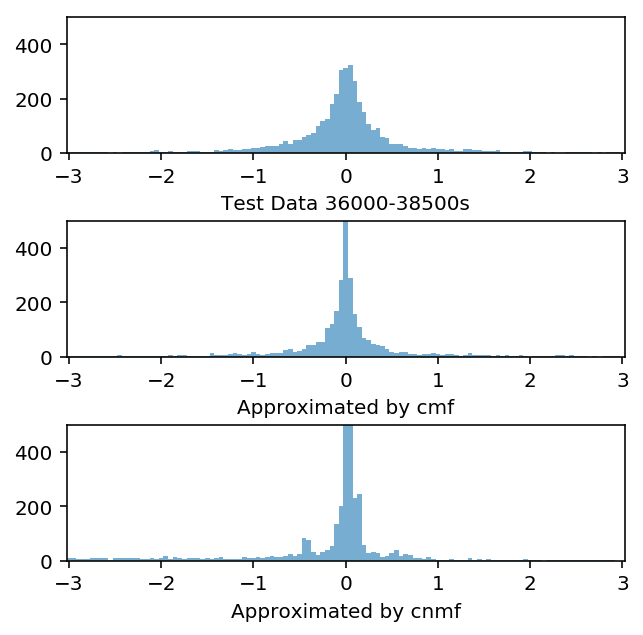

In [10]:
%config InlineBackend.figure_format = 'retina'
plot_estimates_histogram(loader, {'cmf': c2h4_co_completer_dict['cmf'], 'cnmf': c2h4_co_completer_dict['cnmf']}, label=('C2H4', 'CO'))
pass

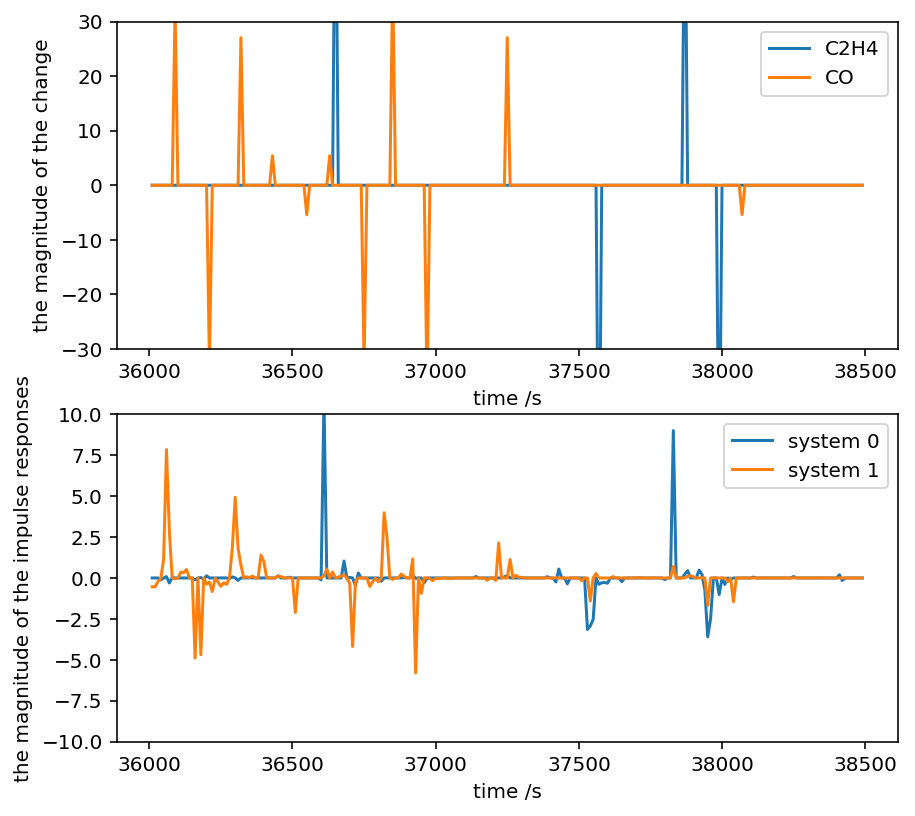

In [11]:
%config InlineBackend.figure_format = 'retina'
plot_ground_truth(loader, c2h4_co_completer_dict['cmf'], label=('C2H4', 'CO'), signal_sign_permute=[[0,-1],[-1,0]], figsize=(7,8))
pass